In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import os 
import glob
import cv2
import tensorflow as tf
import tensorflow_hub as hub
import warnings
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
warnings.filterwarnings('ignore')

In [19]:
test_path =r"F:\mohamed\4th_year_new\NN\project\NN Dataset\Test"
test_imgs=os.listdir(test_path)

In [20]:
code = {'Basketball' : 0 , 'Football' : 1 , 'Rowing' : 2 , 'Swimming' :3 ,"Tennis" : 4 , "Yoga" : 5}

def get_name(n):

    for x,y in code.items() :
        if y == n :
            return x

In [21]:
#get labels for training
def get_labels(train_imgs):
    for cur_img in train_imgs:
        if "Basketball" in cur_img :
            label = (code["Basketball"])
        elif "Football" in cur_img :
            label = (code["Football"])
        elif "Rowing" in cur_img :
            label = (code["Rowing"])
        elif "Swimming" in cur_img :
            label = (code["Swimming"])
        elif "Tennis" in cur_img :
            label = (code["Tennis"])
        elif "Yoga" in cur_img :
            label = (code["Yoga"])

        train_labels.append(label)
    return train_labels

In [22]:
#reading images 
def reading_resize(train_imgs,train_path,image_size):
    l=[]
    for g in train_imgs:   
        img_path=os.path.join(train_path,g)
        img=cv2.imread(img_path)   
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        res = cv2.resize(img, (image_size, image_size))
        l.append(res)
        
    return l

In [23]:
# reading test data
image_size=224
l_test=reading_resize(test_imgs,test_path,image_size)

In [24]:
test = np.array(l_test)
print(test.shape)

(688, 224, 224, 3)


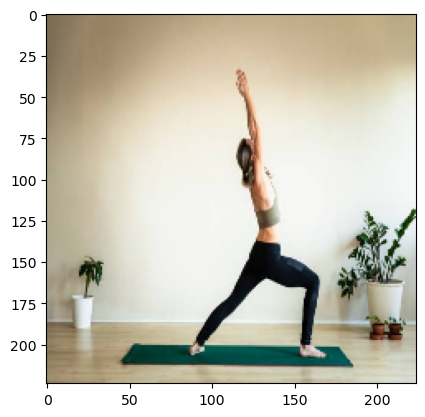

In [25]:
plt.imshow(test[200])

In [26]:
test_names=[]
for g in test_imgs:   
    test_names.append(g)

In [27]:
len(test_names)

688

In [28]:
#normalize
test=test/255.0

In [29]:
reloaded_keras_model=tf.keras.models.load_model(r'F:\mohamed\4th_year_new\NN\project\model station1.h5')
reloaded_keras_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1000)             4253864   
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense (Dense)               (None, 6)                 6006      
                                                                 
Total params: 4,259,870
Trainable params: 4,237,982
Non-trainable params: 21,888
_________________________________________________________________


### in case images with embedded labels

In [13]:
#true_labels=get_labels(test_imgs)


In [ ]:
# #predtest
# p=reloaded_keras_model.predict(test)

# plt.figure(figsize=(25,25))
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(X_val[i])
#     color = 'green' if get_name(np.argmax(p[i])) == get_name(np.argmax(true_labels[i])) else 'red'
#     plt.xlabel(get_name(np.argmax(p[i])),color=color)
# plt.show()

### in case images without labels

In [30]:
test_out=reloaded_keras_model.predict(test)

22/22 [==============================] - 13s 460ms/step


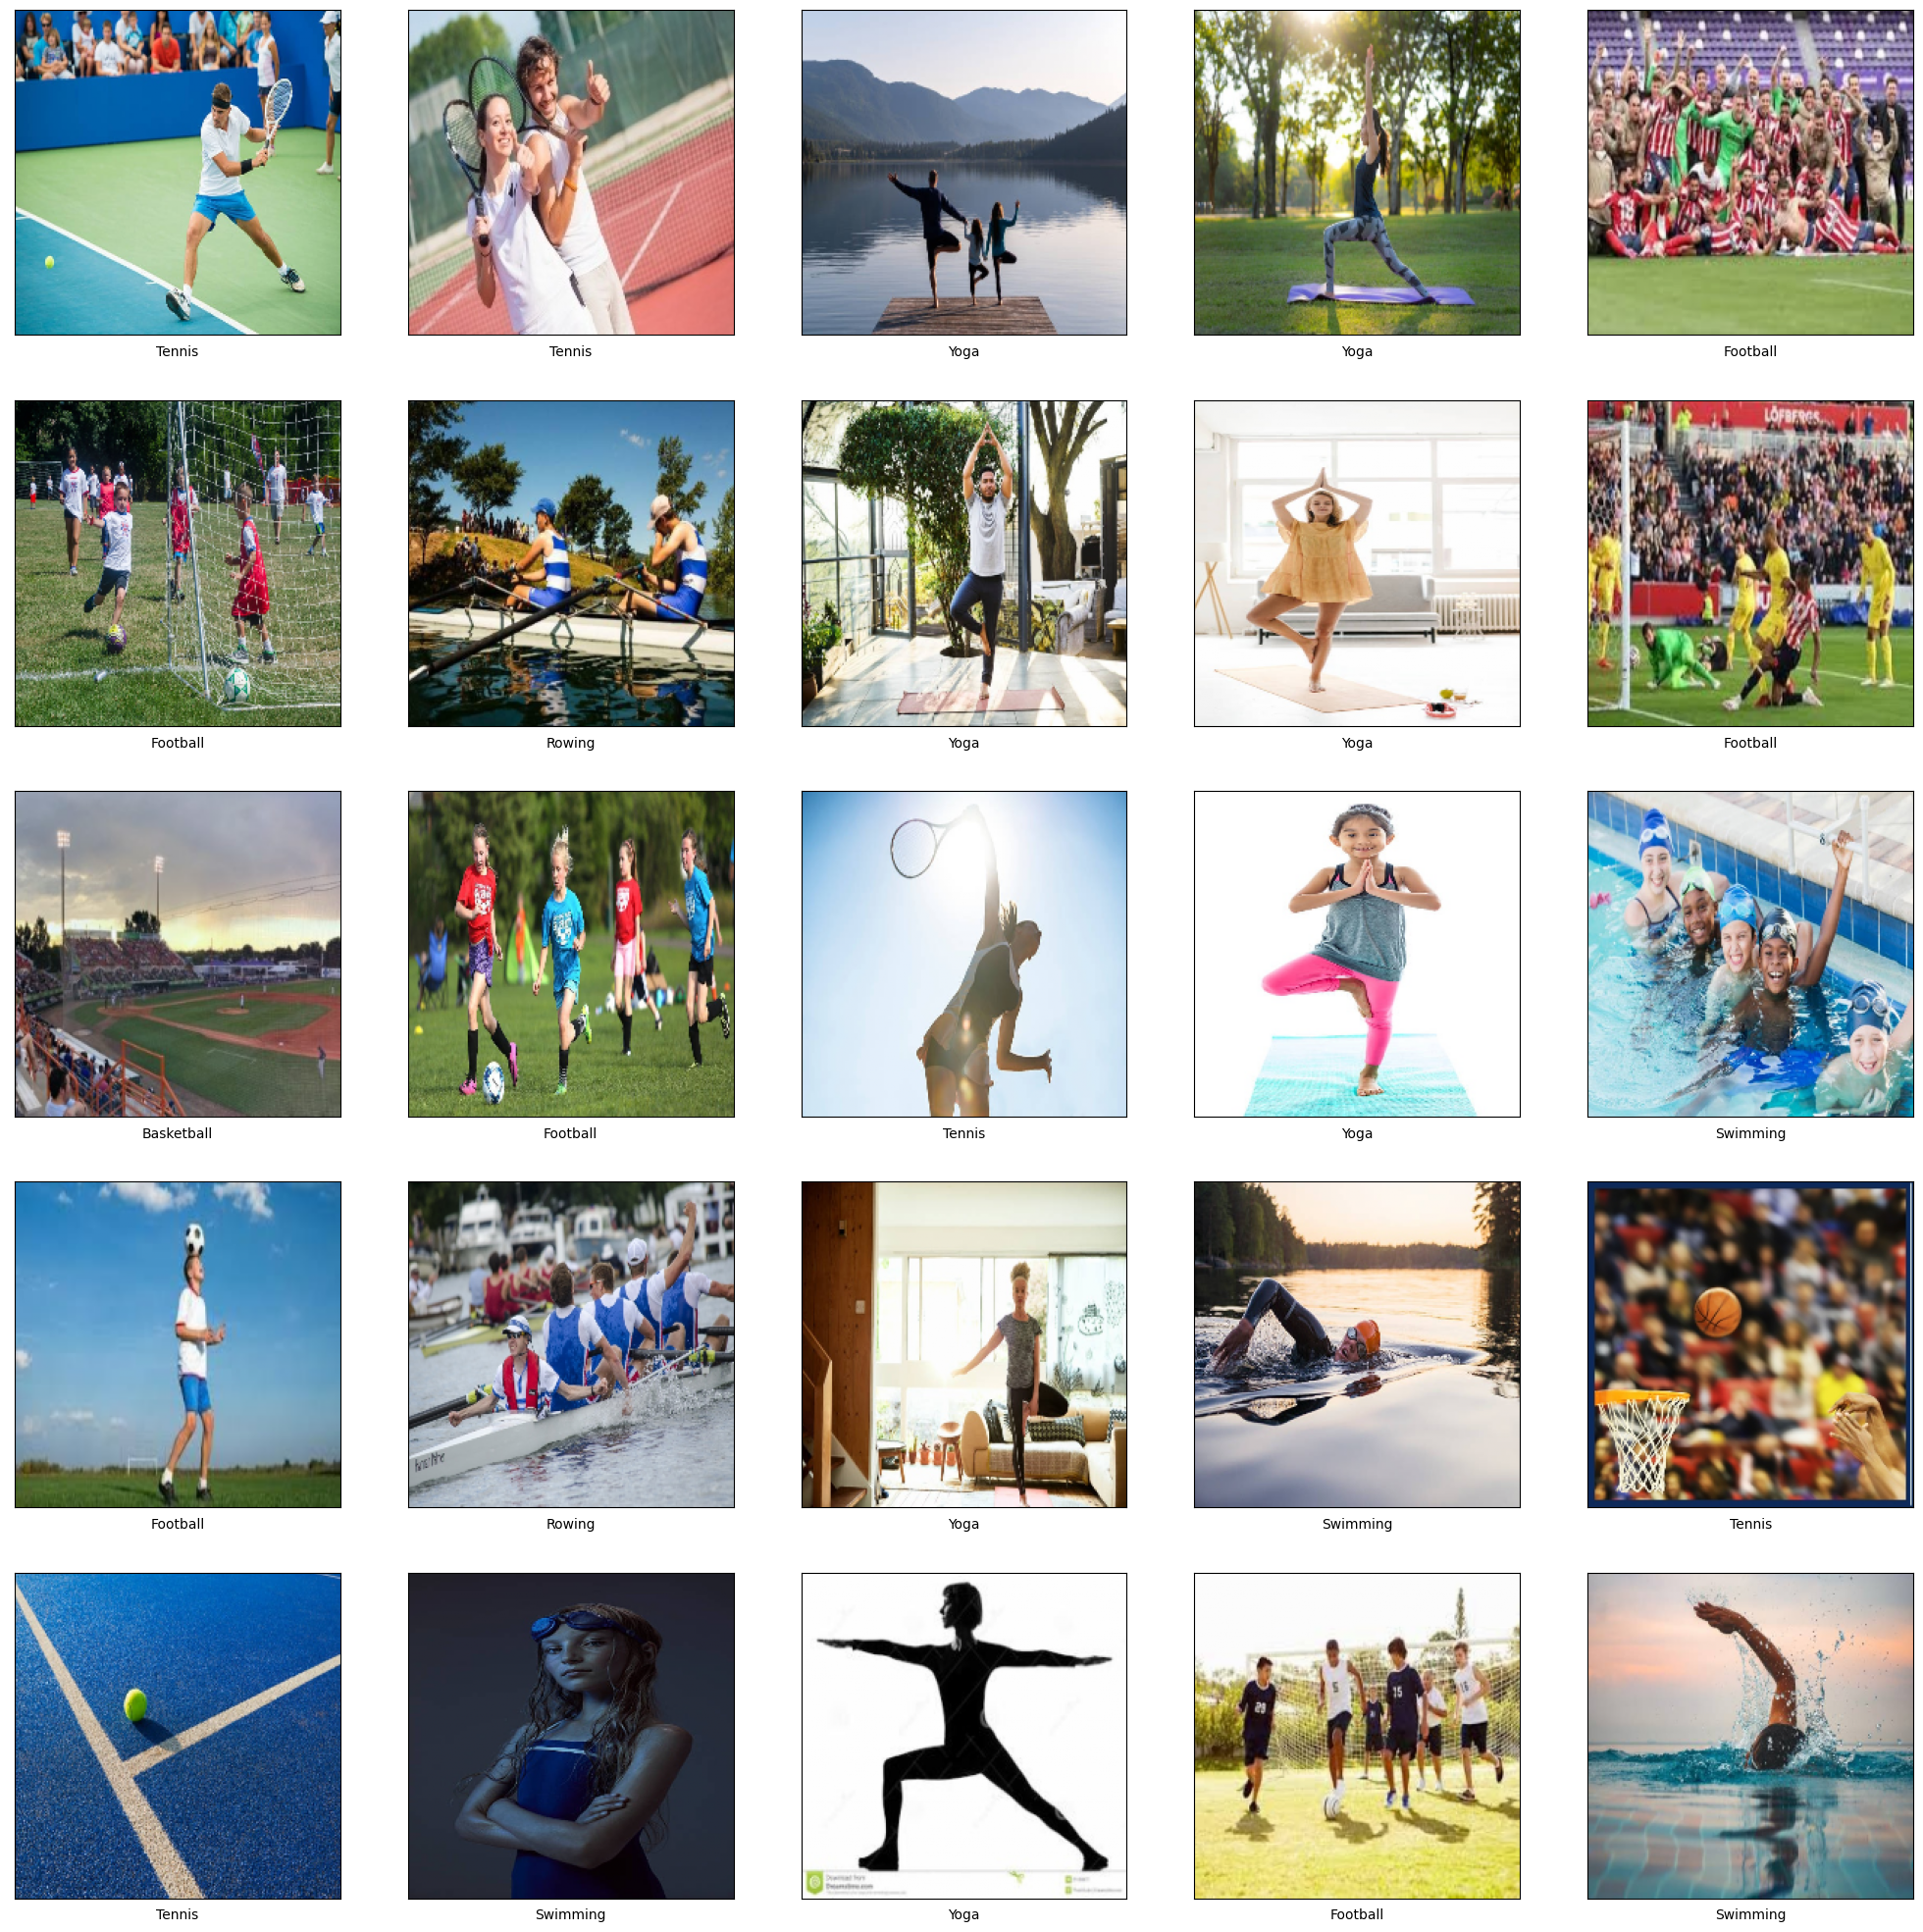

In [31]:
#pred
p=test_out

plt.figure(figsize=(25,25))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test[i])
    plt.xlabel(get_name(np.argmax(p[i])))
plt.show()

In [40]:
pred_out=[]
for i in range(len(test_out)):
    label=np.argmax(test_out[i])
    pred_out.append([test_names[i],label])

In [41]:
Datapd=pd.DataFrame(pred_out,columns=['image_name','label'])
Datapd.head()

image_name  label
0      0.jpg      4
1      1.jpg      4
2     10.jpg      5
3    100.jpg      5
4    101.jpg      1

In [42]:
pred_out=[]
for i in range(len(test_out)):
    label=np.argmax(test_out[i])
    pred_out.append([test_names[i],get_name(label)])
    
Datapd=pd.DataFrame(pred_out,columns=['image_name','label'])
Datapd.head()

image_name     label
0      0.jpg    Tennis
1      1.jpg    Tennis
2     10.jpg      Yoga
3    100.jpg      Yoga
4    101.jpg  Football

In [ ]:
#Datapd.to_csv('/kaggle/working/sports_6_classs_preds__.csv',index=False)